<br>

# Técnicas Matemáticas para Big Data - Project 2
<br><br>


GROUP 5:
- João Ferreira - Nº 106078 - 33.33% Work Participation
- Ahmed Aziz Bousbih - Nº 130153 - 33.33% Work Participation
- Student 3 - Nº xxxxx - ??% Work Participation

<br><br>

## 1. Introduction to the problem of study [1,0 valor]

Financial markets do not behave in a constant or predictable way. Instead, they move through periods of relative stability, where price changes are small, and periods of stronger turbulence, marked by sudden and irregular movements. These different phases are commonly known as volatility regimes. Identifying such regimes is important for understanding market behaviour and for practical tasks such as risk assessment and investment decisions.

One of the main challenges is that volatility regimes are not directly observable. Historical financial data usually provides daily prices, volumes, and returns, but there is no variable indicating whether the market was operating in a low-volatility phase, a transitional situation, or a period of extreme instability. The true state of the market is hidden, while only the resulting price movements can be measured.

This work focuses on addressing this problem by analysing daily log-returns of a financial asset using a Hidden Markov Model (HMM). An HMM is a probabilistic model designed to infer unobserved states from observed data. In this context, we assume that the market can be in one of three states—**low volatility**, **moderate volatility**, or **extreme volatility**, each one associated with different returns.

The main goal of this study is to estimate how these hidden regimes evolve over time, to describe their properties, and to evaluate how effectively an HMM can detect transitions between them.

<br><br>
## 2. Brief and general description of the approach and methods used [1,5 valor]

The aim of this project is to analyse the volatility behaviour of NVIDIA Corporation (NVDA) through a statistical model capable of identifying hidden market regimes. To achieve this, the approach is based on the use of a Hidden Markov Model (HMM) applied to the daily log-returns of NVIDIA’s stock prices. The HMM framework is particularly suitable for this task, as it assumes that the observed data are generated by an unobserved sequence of latent states, each representing a different volatility regime.

The methodology begins by collecting historical daily price data for NVIDIA from Yahoo Finance. From these prices, daily log-returns are computed, as they provide a more stable and statistically convenient representation of market fluctuations. These returns serve as the observable input to the HMM.

The model considered in this study assumes the existence of three latent regimes: **low volatility**, **moderate volatility**, and **extreme volatility**. Each regime is characterised by its own statistical distribution of returns, typically modelled as Gaussian with different variances. The parameters of the HMM — including the means and variances of each regime and the transition probabilities between regimes — are estimated using the Baum–Welch algorithm.

After the model is fitted, the Viterbi algorithm is used to infer the most likely sequence of hidden volatility regimes over time. This allows the analysis of how NVIDIA’s stock transitions between calm periods(low volatility), transitional phases(moderate volatility), and high-turbulence episodes(extreme volatility). The results provide a structured way to interpret the evolution of NVIDIA’s volatility and to identify moments that correspond to significant market events or changes in investor behaviour.

<br><br>
## 3. Brief History and literature review of the problem and methods/algorithms [1,5 valor]

Hidden Markov Models (HMMs) were developed in the late 1960s through the work of Leonard E. Baum and colleagues, who introduced key algorithms such as Forward-Backward(Baum-Welch) method for parameter estimation and the Viterbi algorithm for decoding hidden states.

One of the first applications of HMMs was speech recognition, starting in the mid-1970s. From the linguistics point of view, hidden Markov models are equivalent to stochastic regular grammar.

In the 1990s, HMMs became popular in finance to model regime-switching behaviour in time series. Traditional linear models were insufficient to capture the frequent structural breaks and changing volatility observed in stock prices, interest rates, and exchange rates. HMMs offered a natural framework for representing these dynamics, where different market regimes (such as bull markets, bear markets, or high/low volatility periods) correspond to distinct hidden states.

Hamilton (1989) introduced regime-switching models that allow economic time series to exhibit different behaviours in different states, which closely relate to the HMM framework. Subsequent studies demonstrated that HMMs could effectively capture volatility clustering, fat tails, and other stylized facts of financial returns. By explicitly modelling unobservable market states, HMMs enable more accurate forecasting and risk assessment.

Nowaday, HMMs continue to play a key role in both research and real-word applications. Their capacity to uncover hidden patterns from noisy data makes them especially valuable in context where financial information is becoming increasingly complex and high-dimensional.

<br><br>
## 4. About the main method/algorithm used [1,5 valor]

### Hidden Markov Models: Core Concepts

A Hidden Markov Model is a statistical model that represents a system assumed to be a Markov process with unobserved (hidden) states. The model consists of two main components:

1. **Hidden States**: A sequence of latent states $X_1, X_2, \ldots, X_T$ that evolve over time according to a Markov property—the probability of transitioning to a new state depends only on the current state, not on past states.

2. **Observations**: A sequence of observable outputs $Y_1, Y_2, \ldots, Y_T$ where each observation is generated by the current hidden state according to an **emission probability distribution**.

### Key Components of an HMM

An HMM is fully specified by the following parameters:

- **States**: A finite set of $N$ hidden states ${x_1, x_2, \ldots, x_N}$
- **Initial State Distribution** $\pi$: The probability distribution over states at time $t=0$
- **Transition Matrix** $A$: An $N \times N$ matrix where $a_{ij}$ represents the probability of transitioning from state $i$ to state $j$
- **Emission Probabilities** $B$: The probability distributions that govern how observations are generated from each state

### The Three Fundamental Problems

HMMs address three fundamental computational problems:

**1. Evaluation Problem (Forward Algorithm)**  
For a given model and a sequence of observations, the goal is to determine how likely is to obtain that sequence. it uses dynamic programming to aggregate probabilities over time.

**2. Decoding Problem (Viterbi Algorithm)**  
The objective is to recover the sequence of hidden states that best explains the observed data. The Viterbi algorithm computes this by finding the path with the highest probability, again relying in dynamic programming.

**3. Learning Problem (Baum-Welch Algorithm)**  
Given only observations, estimate the model parameters that maximize the likelihood of the data. The Baum-Welch algorithm is an Expectation-Maximization (EM) algorithm that iteratively refines parameter estimates:
- **E-step**: Compute expected state occupancies and transitions given current parameters
- **M-step**: Update parameters to maximize likelihood given these expectations

### Application to Financial Volatility

In financial applications, we model:
- **Hidden states**: Different volatility regimes (low, moderate, extreme)
- **Observations**: Daily log-returns of stock prices
- **Emission distributions**: Gaussian distributions with different means and variances for each regime

The transition matrix captures the tendency of markets to persist in a regime or switch between regimes. By estimating these parameters from historical data, we can:
- Identify which regime the market was in at any point in time
- Predict future regime transitions
- Assess the risk profile of different market periods

### Computational Complexity

The algorithms scale as follows:
- **Forward/Backward**: $O(N^2 T)$ where $N$ is the number of states and $T$ is the sequence length
- **Viterbi**: $O(N^2 T)$
- **Baum-Welch**: $O(I \cdot N^2 T)$ where $I$ is the number of iterations

This makes HMMs computationally efficient even for long time series with moderate numbers of states.

<br><br>

## 5. Python imports and global configurations [0,5 valor]

### Install and import the necessary libraries to compute the Bayesian Network and perform other methods  

In [18]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn.hmm import GaussianHMM

<br><br>

## 6. Dataset and variables explanation [1,5 valor]

### Data Source and Scope
The dataset used in this study consists of historical daily stock prices for **NVIDIA Corporation (NVDA)**. The data was retrieved using the `yfinance` API, which sources market data directly from Yahoo Finance.

The raw dataset contains daily trading records, where each row represents one trading day and each column represents a different market variable. The data typically include information such as opening price, highest and lowest prices of the day, closing price, adjusted closing price, and trading volume.

#### Source of the data

- **Data provider:** Yahoo Finance  
- **Stock ticker:** NVDA (NVIDIA Corporation)  
- **Frequency:** Daily  
- **Time span:** Defined in the code (e.g., from 2010 to 2024)

---

#### Raw variables in the dataset

The main variables available in the raw dataset are described in the table below:

| Variable Name | Description |
|---------------|-------------|
| Open | Price of the stock at the beginning of the trading day |
| High | Highest price reached during the trading day |
| Low | Lowest price reached during the trading day |
| Close | Price of the stock at the end of the trading day |
| Adj Close | Closing price adjusted for corporate actions (splits, dividends) |
| Volume | Number of shares traded during the day |

Although all of these variables are available, this project focuses primarily on the **Close** price, since it represents the consolidated market price at the end of each trading day and is commonly used in financial research.

---

**Time Span:** January 1, 2010 – January 1, 2024  
This 14-year period was selected to ensure the model captures a wide variety of market conditions, including:
* The post-2008 economic recovery.
* The cryptocurrency mining booms (which heavily impacted GPU demand).
* The COVID-19 pandemic volatility.
* The recent AI-driven surge in valuation.

### Variables Description

The analysis relies on the following key variables:

**1. `Close` (Observed)**
* **Definition:** The final trading price of the stock at the end of each business day.
* **Role:** This is the raw input data. However, raw prices are rarely used directly in HMMs because they are non-stationary (they tend to drift upwards over time rather than fluctuating around a constant mean).

**2. `Log_Returns` (Transformed Observation)**
* **Definition:** The natural logarithm of the ratio between consecutive daily closing prices.
* **Formula:** $$r_t = \ln\left(\frac{P_t}{P_{t-1}}\right)$$
* **Role:** This is the actual variable fed into the Hidden Markov Model.
* **Justification:**
    * **Stationarity:** Unlike prices, returns oscillate around zero, making them statistically stable.
    * **Normality:** Log-returns often approximate a Gaussian (Normal) distribution, satisfying the assumption of the `GaussianHMM`.
    * **Additivity:** Log-returns are time-additive, simplifying multi-period analysis.

**3. `Regime` (Hidden State)**
* **Definition:** A categorical variable inferred by the model (not present in the original data).
* **Role:** Represents the latent state of the market volatility.
* **Values:**
    * **0 (Low Volatility):** Small price changes, stable market.
    * **1 (Moderate Volatility):** Normal market fluctuations.
    * **2 (High Volatility):** Large price swings, typical of crashes or rallies.


---

#### Variables used in the model

The Hidden Markov Model does not use all raw variables directly. Instead, the model uses the following variables:

| Type of variable | Name | Description |
|------------------|------|-------------|
| Observed variable | Log-Returns | Numeric value representing day-to-day price variation |
| Hidden variable | Regime | Latent state representing market condition (low, moderate, extreme) |

The volatility regimes are not present in the original dataset and are inferred by the model.

---

#### Final structure of the working dataset

After preprocessing, the working dataset contains the following main columns:

| Column name | Description |
|-------------|-------------|
| Close | Daily closing price of NVDA stock |
| Log-Returns | Daily log-return of the closing price |
| Regime | Hidden state inferred by the HMM (low, moderate, extreme volatility) |

This structured dataset serves as the input for training the Hidden Markov Model and for analysing the temporal behaviour of NVIDIA’s stock volatility.

<br><br>

## 7. Main code as possible solution to the problem [1,5 valor] 

#### 7.1 Data Preparation

The first step consists of preparing the dataset for modelling. The daily log-returns are extracted from the original dataset and converted into a numerical format that can be processed by the Hidden Markov Model. This step ensures that the data is clean, structured, and suitable for probabilistic analysis.

In [19]:
ticker = "NVDA"
data = yf.download(ticker, start = "2010-01-01", end = "2024-01-01",auto_adjust=True)
data['Log_Returns'] = np.log(data['Close'] / data['Close'].shift(1))
data.dropna(inplace=True)
X = data['Log_Returns'].values.reshape(-1, 1)
# Display the first few rows to visualize the variables
print("Dataset Preview:")
print(data[['Close', 'Log_Returns']].head())


[*********************100%***********************]  1 of 1 completed

Dataset Preview:
Price          Close Log_Returns
Ticker          NVDA            
Date                            
2010-01-05  0.430019    0.014497
2010-01-06  0.432770    0.006376
2010-01-07  0.424289   -0.019792
2010-01-08  0.425206    0.002158
2010-01-11  0.419246   -0.014115


#### 7.2 Model Definition

A Gaussian Hidden Markov Model is defined with three hidden states representing different volatility regimes: low, moderate, and extreme volatility. Each state is modelled using a normal distribution to capture the statistical behaviour of returns under different market conditions.

In [20]:
model = GaussianHMM(n_components=3, covariance_type="diag", n_iter=100, random_state=42)

#### 7.3 Model Training
The model is trained using the daily log-returns dataset. Internally, the training process relies on the Baum–Welch algorithm, which is a special case of the Expectation–Maximization (EM) method. During this process, the model learns the transition probabilities between hidden states and the parameters of the Gaussian emission distributions.

In [21]:
model.fit(X)

,n_components,3
,covariance_type,'diag'
,min_covar,0.001
,startprob_prior,1.0
,transmat_prior,1.0
,means_prior,0
,means_weight,0
,covars_prior,0.01
,covars_weight,1
,algorithm,'viterbi'
,random_state,42


#### 7.4 Hidden State Decoding

After the training phase, the model predicts the most likely hidden state for each day. These predicted states are interpreted as volatility regimes and allow the analysis of how market conditions change over time.




In [22]:
hidden_states = model.predict(X)
data['Regime'] = hidden_states

#### 7.5 Hidden State Reordering Based on Volatility


In [23]:
volatility_order = np.argsort(model.covars_.flatten())
reordered_states = {old_label: new_label for new_label, old_label in enumerate(volatility_order)}
data['Regime'] = data['Regime'].map(reordered_states)

<br><br>

## 8. Analysis of Example 1 – Volatility Regime Detection [3,0 valor]

This section analyses the results obtained from the Hidden Markov Model applied to NVIDIA’s daily log-returns. After training the model and decoding the hidden states, each trading day was assigned to a specific volatility regime.

The purpose of this section is to evaluate how the detected regimes are distributed over time and to interpret their financial meaning.

---

#### 8.1 Distribution of Volatility Regimes

The first step of the analysis consists of examining how frequently each volatility regime occurs. This allows an understanding of whether the market spends more time in each state.

The frequency of each regime is computed as follows:

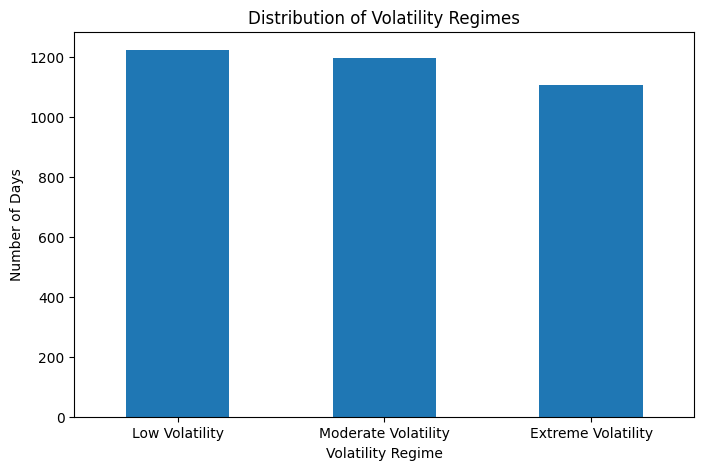

In [24]:
labels = ['Low Volatility', 'Moderate Volatility', 'Extreme Volatility']

data["Regime_Label"] = data["Regime"].apply(lambda x: labels[x])
regime_counts = data["Regime_Label"].value_counts()
plt.figure(figsize=(8, 5))
regime_counts.plot(kind="bar")

plt.title("Distribution of Volatility Regimes")
plt.xlabel("Volatility Regime")
plt.ylabel("Number of Days")
plt.xticks(rotation=0)
plt.show()


#### 8.2 Statistical Properties of Each Regime
To better understand the characteristics of each regime, basic descriptive statistics are calculated. These include the mean return, standard deviation, and number of observations for each regime.

For each regime, the following measures are computed:

- **Mean return** – average daily return inside the regime  
- **Standard deviation** – variability of returns (volatility level)  
- **Number of observations** – total number of days assigned to the regime  

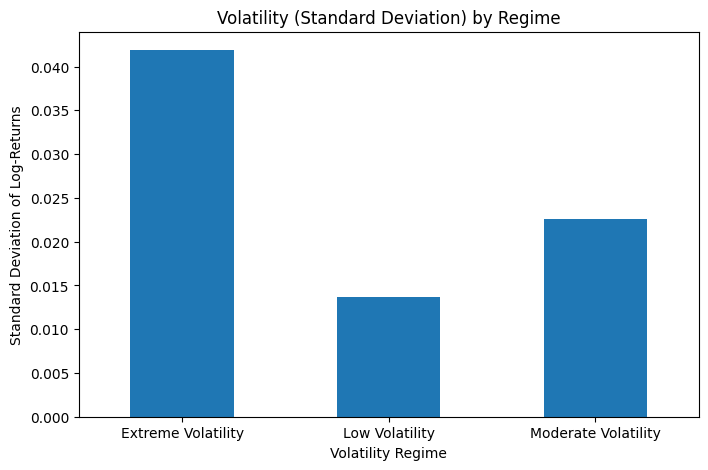

In [25]:

regime_stats = data.groupby("Regime_Label")["Log_Returns"].agg(["mean", "std", "count"])
regime_stats = regime_stats.round(6)


plt.figure(figsize=(8,5))

regime_stats["std"].plot(kind="bar")

plt.title("Volatility (Standard Deviation) by Regime")
plt.xlabel("Volatility Regime")
plt.ylabel("Standard Deviation of Log-Returns")
plt.xticks(rotation=0)
plt.show()


The results show clear differences between regimes. The low-volatility regime presents smaller variability in returns, indicating more stable market conditions. The moderate-volatility regime shows increased dispersion, reflecting higher uncertainty. The extreme-volatility regime exhibits the highest standard deviation, confirming that these periods are associated with stronger price fluctuations and increased market risk.

#### 8.3 Visual Representation of Regimes on NVIDIA Stock Price
A visual inspection of the results is performed by plotting the stock price and colouring each point according to its associated volatility regime.

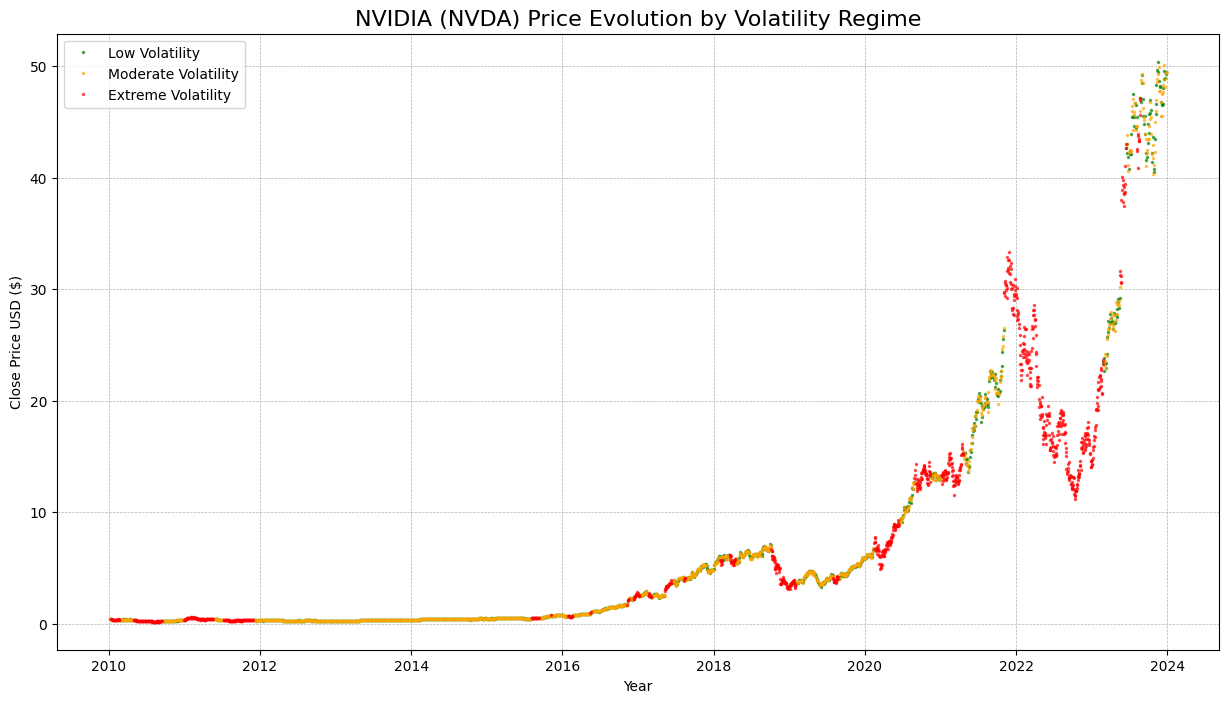

In [26]:
plt.figure(figsize=(15, 8))
colors = ['green', 'orange', 'red'] # Green=Low, Orange=Moderate, Red=High


for regime_idx, color in enumerate(colors):
    mask = data['Regime'] == regime_idx
    plt.plot(data.index[mask], data['Close'][mask], '.', markersize=3, 
             color=color, label=labels[regime_idx], alpha=0.6)

plt.title(f"NVIDIA (NVDA) Price Evolution by Volatility Regime", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Close Price USD ($)")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

#### 8.4 Interpretation of the Detected Regimes

The visual and statistical analyses suggest that the Hidden Markov Model successfully segmented the market into distinct volatility regimes. Periods classified as low volatility are generally associated with smoother price movements and more stable trends.

In contrast, moderate and extreme volatility regimes tend to coincide with sharper price movements and increased market uncertainty. These periods may reflect major economic events, earnings announcements, technological shifts, or broader market stress.

Overall, the detected regimes provide a meaningful representation of the changing risk structure of the market and illustrate how probabilistic models can be used to reveal hidden patterns in financial time series.


<br><br>

## 9. Analysis of Example 2 [3,0 valor]

In [27]:
extreme_volatility_state = 2

In [28]:
data['Signal'] = np.where(data['Regime'] == extreme_volatility_state, 0, 1)
data['Signal'] = data['Signal'].shift(1)

In [29]:
data['Strategy_Returns'] = data['Signal'] * data['Log_Returns']

In [30]:
data['Buy_and_Hold_Cumulative'] = data['Log_Returns'].cumsum().apply(np.exp)
data['HMM_Strategy_Cumulative'] = data['Strategy_Returns'].cumsum().apply(np.exp)

In [31]:
print(data[['Log_Returns', 'Regime', 'Signal', 'Strategy_Returns']].tail())

Price      Log_Returns Regime Signal Strategy_Returns
Ticker                                               
Date                                                 
2023-12-22   -0.003271      1    1.0        -0.003271
2023-12-26    0.009153      0    1.0         0.009153
2023-12-27    0.002796      1    1.0         0.002796
2023-12-28    0.002123      0    1.0         0.002123
2023-12-29    0.000000      1    1.0         0.000000


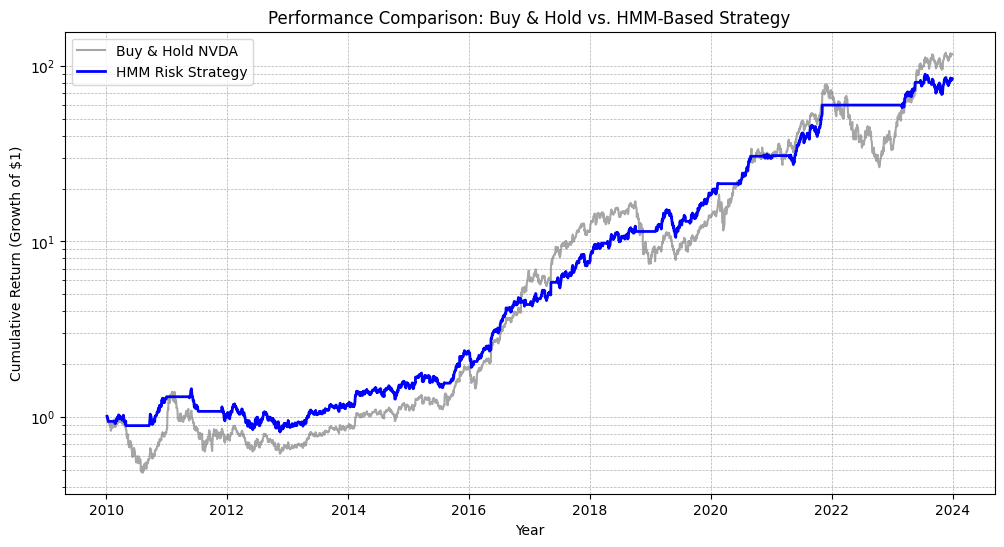

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(data.index, data['Buy_and_Hold_Cumulative'], label='Buy & Hold NVDA', color='gray', alpha=0.7)
plt.plot(data.index, data['HMM_Strategy_Cumulative'], label='HMM Risk Strategy', color='blue', linewidth=2)

plt.title("Performance Comparison: Buy & Hold vs. HMM-Based Strategy")
plt.xlabel("Year")
plt.ylabel("Cumulative Return (Growth of $1)")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.yscale('log')
plt.show()

## Case Study: The 2022 Market Correction

The year 2022 offers the most compelling evidence of the HMM strategy's effectiveness. As seen in the graph, the Buy & Hold strategy (Gray Line) suffers a catastrophic drawdown, losing a significant portion of its value as the tech sector crashed due to macroeconomic factors.

In sharp contrast, the HMM Strategy (Blue Line) effectively "flat-lines" (becomes horizontal) throughout the majority of 2022. This horizontal movement indicates that the model successfully identified the onset of the Extreme Volatility Regime early in the crash. By triggering a "Sell/Cash" signal, the strategy avoided the massive losses experienced by the asset, effectively preserving the capital gained during the previous bull run. This allowed the portfolio to resume trading in 2023 from a much higher baseline value than the stock itself.

In [33]:
volatility_bnh = data['Log_Returns'].std() * np.sqrt(252)
volatility_hmm = data['Strategy_Returns'].std() * np.sqrt(252)

In [34]:
days = (data.index[-1] - data.index[0]).days
years = days / 365.25
total_return_bnh = data['Buy_and_Hold_Cumulative'].iloc[-1]
total_return_hmm = data['HMM_Strategy_Cumulative'].iloc[-1]

In [35]:
cagr_bnh = (total_return_bnh) ** (1/years) - 1
cagr_hmm = (total_return_hmm) ** (1/years) - 1

In [36]:
sharpe_bnh = cagr_bnh / volatility_bnh
sharpe_hmm = cagr_hmm / volatility_hmm

print(f"--- Performance Metrics ---")
print(f"Buy & Hold Volatility: {volatility_bnh:.2%}")
print(f"HMM Strategy Volatility: {volatility_hmm:.2%} (Lower is better)")
print(f"-"*30)
print(f"Buy & Hold Sharpe Ratio: {sharpe_bnh:.4f}")
print(f"HMM Strategy Sharpe Ratio: {sharpe_hmm:.4f} (Higher is better)")

--- Performance Metrics ---
Buy & Hold Volatility: 44.57%
HMM Strategy Volatility: 25.92% (Lower is better)
------------------------------
Buy & Hold Sharpe Ratio: 0.9101
HMM Strategy Sharpe Ratio: 1.4408 (Higher is better)


This performances metric allow us to quantify the true value of the HMM strategy beyond simple total returns:

- The model achieves a dramatic reduction in volatility, representing a 42% reducton in portfolio rks

The HMM strategy achieves a high sharpe ratio, that measures how much return an investor generates for every unit of risk taken.
- The improvement from 0.1 to 1.44 indicates tathat that this approach is significantly more efficiente, because ideally, investors seek strategieswith Sharpe Rations above 1.

<br><br>
## 10. Pros and cons of the approach [2,0 valor]

## Pros:
- HMM is able to dectet hidden states that cannot be observed directly, allowing the investor to categorize the market into "regimes" rather that just looking at raw prices.
- The model automatically adapts to changing market conditions, for example, in 2022, HMM understood the crash and adapeted without manual intervention.
- As demonstrated above, the model is able to reduce significantly the volatility and improve the risk-adjusted return.

## Cons:
- The model assus that stock returns follow a normal distribution, but in reality financial markets have extreme crashes happening more often that normal distriubtion predicts.
- The model relies on closing prices to estimate the regime. Thi is not ideal for a "flash crash" scenario, becuse the model will probably react to late.
- The model calculates a single Transistion Matrix for the entire period. This asumes that the market behavior in 2010 is the same as in 2024.

<br><br>
## 11. Future improvements [2,0 valor]

<br>
<div style="text-align: center;">
    <br><br>
    <p style="font-size: 40px;">References [1,0 valor]</p>
</div>
<br>


[1] [Ishijima, H. & Kihara, T. (2005). Option pricing with Hidden Markov Models. Waseda University, Institute of Finance](https://www.waseda.jp/fcom/wbf/assets/uploads/2017/06/wnif05-004.pdf)

[2] [D. Jurafsky and J. H. Martin, “Hidden Markov Models,” in *Speech and Language Processing (3rd ed.)*, Stanford University, 2023.](https://web.stanford.edu/~jurafsky/slp3/A.pdf)

[3] [J. Eisner, “Efficient Inference for Hidden Markov Models,” *Proceedings of the Conference on Empirical Methods in Natural Language Processing*, 2002.](https://www.cs.jhu.edu/~jason/papers/eisner.tnlp02.pdf)

[4] [Towards Data Science, “Hidden Markov Models Explained with a Real-Life Example and Python Code,” 2020.](https://medium.com/data-science/hidden-markov-models-explained-with-a-real-life-example-and-python-code-2df2a7956d65)

[5] [Remi Coulom, “HMMlearn Documentation – Gaussian Hidden Markov Models](https://hmmlearn.readthedocs.io/en/latest/)

[6] [Yahoo Finance, “NVIDIA Corporation (NVDA) Historical Market Data.](https://finance.yahoo.com/quote/NVDA/history)


[7] [The Sharpe Ratio William F. Sharpe Stanford University](https://web.stanford.edu/~wfsharpe/art/sr/sr.htm)





